In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [112]:
print(movies[['genres'][0]])

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
df_movies= movies[['title','genres','production_companies','budget','revenue','vote_average','vote_count']]
df_movies.head()

,title,genres,production_companies,budget,revenue,vote_average,vote_count
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",237000000,2787965087,7.2,11800
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",300000000,961000000,6.9,4500
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",245000000,880674609,6.3,4466
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",250000000,1084939099,7.6,9106
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",260000000,284139100,6.1,2124


In [27]:
movies_barh = df_movies.sort_values('revenue', ascending=False).head(15)

Топ 15 самых высокодоходных фильмов

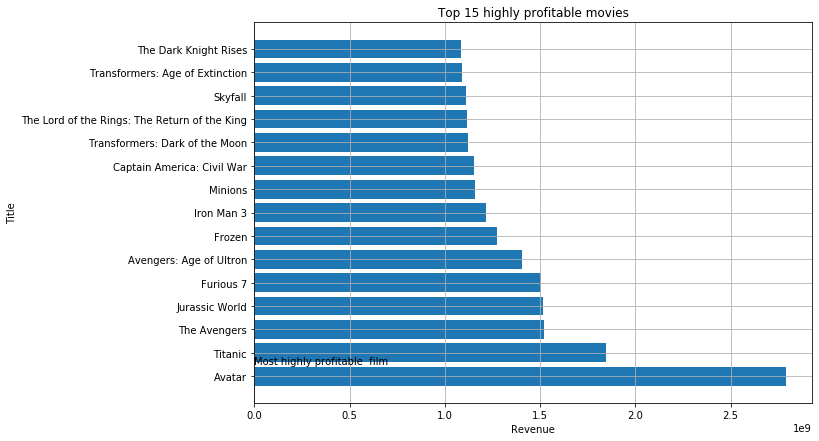

In [29]:

plt.barh(movies_barh['title'], movies_barh['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Title')
plt.title('Top 15 highly profitable movies')
plt.text(2.5, 0.5, 'Most highly profitable  film')
plt.grid()

In [100]:
df = movies_barh[['revenue','budget']]
df.index = movies_barh['title']
df.head(15)

,revenue,budget
title,,
Avatar,2787965087,237000000
Titanic,1845034188,200000000
The Avengers,1519557910,220000000
Jurassic World,1513528810,150000000
Furious 7,1506249360,190000000
Avengers: Age of Ultron,1405403694,280000000
Frozen,1274219009,150000000
Iron Man 3,1215439994,200000000
Minions,1156730962,74000000


Разница между бюджетом фильма и доходом от нео

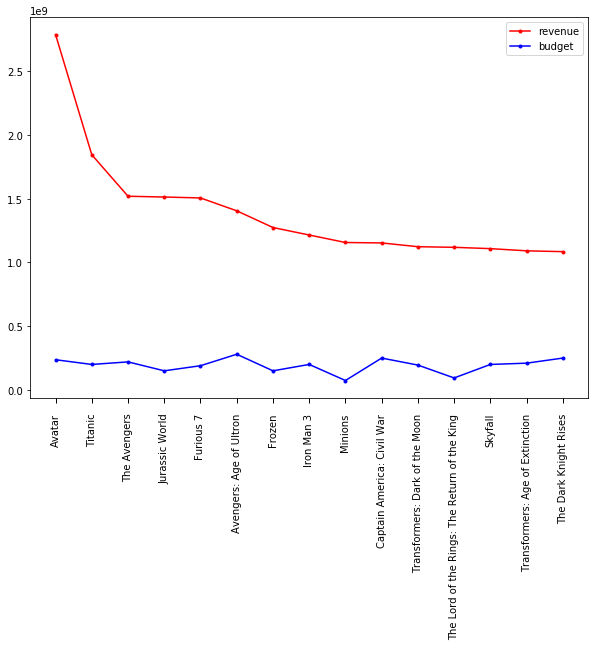

In [106]:
fig, ax = plt.subplots()
ax.plot(movies_barh['title'], movies_barh['revenue'], color = 'r', marker = '.', label = 'revenue')
ax.plot(movies_barh['title'], movies_barh['budget'], color = 'b', marker = '.', label = 'budget')
plt.legend()
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 5,    #  Длинна делений
               width = 1,     #  Ширина делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               bottom = True,    #  Рисуем метки снизу
               labelbottom = True,    #  Рисуем подписи снизу
               labelrotation = 90)    #  Поворот подписей

То же, но отображение через площади

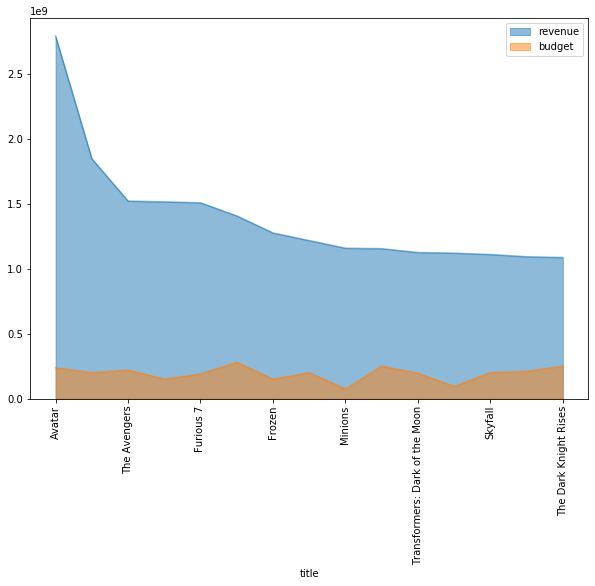

In [109]:

df[list(df.columns)]\
    .plot(kind='area', rot=90, stacked=False)